# Machine Learning model for predicting ICU admission in Brazil for covid19 patients

#### the aim is to help reduce strain on ICU beds and admit those that are at a higher risk and needing the beds more. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_excel('Brazil_Covid19_ICU_ML_DataSet.xlsx')

df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [3]:
df.shape

(1925, 231)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [5]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
df.select_dtypes(include=['object']).columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [7]:
df.columns.tolist()

['PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'AGE_PERCENTIL',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_

In [8]:
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df['PATIENT_VISIT_IDENTIFIER'].value_counts()

PATIENT_VISIT_IDENTIFIER
0      5
193    5
263    5
262    5
261    5
      ..
126    5
125    5
124    5
123    5
384    5
Name: count, Length: 385, dtype: int64

In [12]:
df.isnull().sum().sort_values(ascending=False)

P02_VENOUS_MIN              1104
LEUKOCYTES_MAX              1104
PC02_VENOUS_MEAN            1104
PC02_VENOUS_MIN             1104
PC02_VENOUS_MAX             1104
                            ... 
PATIENT_VISIT_IDENTIFIER       0
AGE_ABOVE65                    0
GENDER                         0
AGE_PERCENTIL                  0
ICU                            0
Length: 231, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

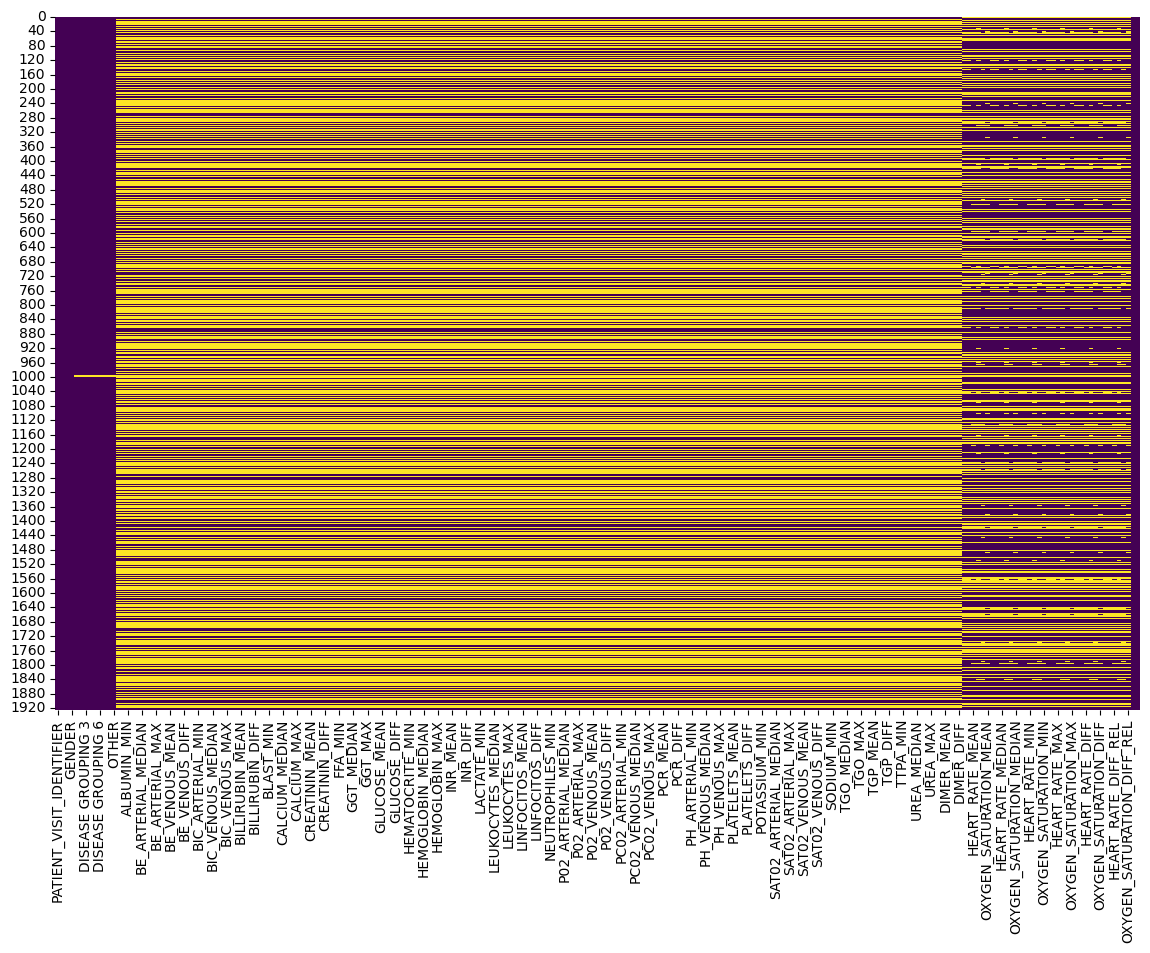

In [13]:
plt.figure(figsize=(14,9))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show

#### there seems to be a lot of of missing values. next step would be to backfill and use the next valid observation to fill the gap

In [14]:
df_filled = df.fillna(method='ffill').fillna(method='bfill')

C:\Users\manao\AppData\Local\Temp\ipykernel_1572\1356426984.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill').fillna(method='bfill')


<function matplotlib.pyplot.show(close=None, block=None)>

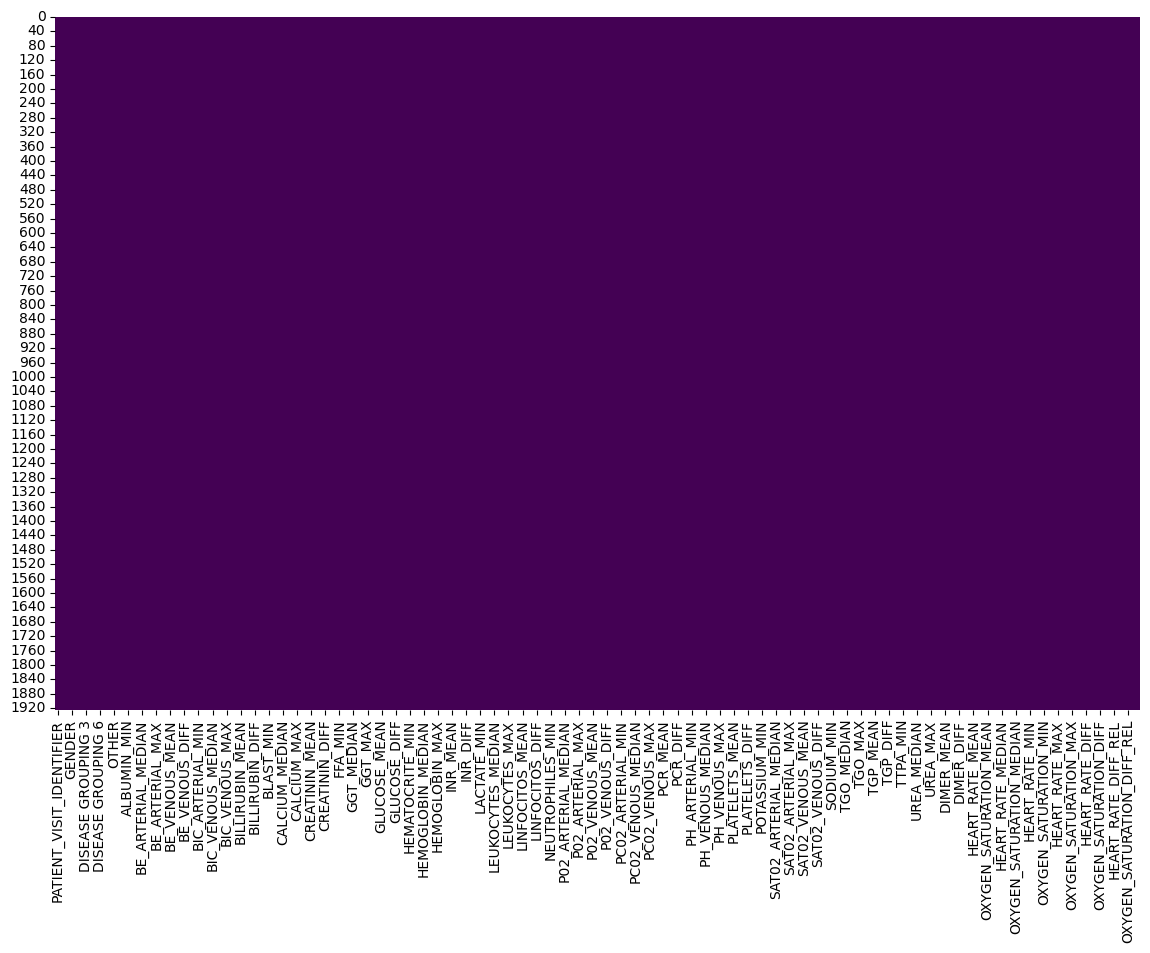

In [15]:
plt.figure(figsize=(14,9))
sns.heatmap(df_filled.isnull(), cbar=False, cmap='viridis')
plt.show

In [16]:
df_filled.isnull().sum()

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64

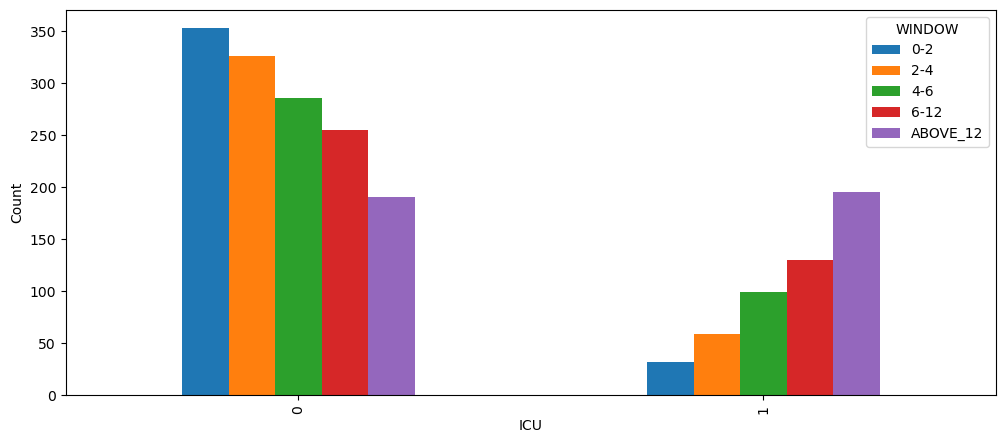

In [17]:
grouped_ICU_Admission_by_Wndow = df.groupby(['ICU', 'WINDOW']).size().unstack()

grouped_ICU_Admission_by_Wndow.plot(kind='bar', figsize=(12,5))
plt.xlabel('ICU')
plt.ylabel('Count')
plt.legend(title='WINDOW')
plt.show()

## Mapping Age percentile and Window 

In [18]:
df['AGE_PERCENTIL'].unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

In [19]:
mapped_window = {'0-2': 0, '2-4': 1, '4-6': 2, '6-12': 3, 'ABOVE_12': 4}
mapped_age_percentil = {'10th': 0.01, '20th': 0.02, '30th': 0.03, '40th': 0.04, '50th': 0.05, '60th': 0.06, '70th': 0.07, '80th': 0.08, '90th': 0.09, 'Above 90th': 0.1}

df_filled['WINDOW'] = df_filled['WINDOW'].map(mapped_window)
df_filled['AGE_PERCENTIL'] = df_filled['AGE_PERCENTIL'].map(mapped_age_percentil)

df_filled

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,0.06,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0
1,0,1,0.06,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0
2,0,1,0.06,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0
3,0,1,0.06,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3,0
4,0,1,0.06,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,0.05,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0
1921,384,0,0.05,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0
1922,384,0,0.05,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0
1923,384,0,0.05,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3,0


In [38]:
correlation_matrix = df_filled.corr()

corr_w_ICU = correlation_matrix['ICU'].sort_values(ascending = False)

top_positive_correlations = corr_w_ICU.head(10)
top_negative_correlations = corr_w_ICU.tail(10)

positive_correlations, negative_correlations

(ICU                          1.000000
 RESPIRATORY_RATE_MEAN        0.360365
 RESPIRATORY_RATE_MEDIAN      0.339394
 WINDOW                       0.329429
 RESPIRATORY_RATE_MAX         0.321353
 AGE_PERCENTIL                0.238037
 RESPIRATORY_RATE_DIFF        0.219276
 AGE_ABOVE65                  0.212198
 RESPIRATORY_RATE_DIFF_REL    0.208127
 UREA_MEDIAN                  0.187418
 Name: ICU, dtype: float64,
 PLATELETS_DIFF        NaN
 POTASSIUM_DIFF        NaN
 SAT02_ARTERIAL_DIFF   NaN
 SAT02_VENOUS_DIFF     NaN
 SODIUM_DIFF           NaN
 TGO_DIFF              NaN
 TGP_DIFF              NaN
 TTPA_DIFF             NaN
 UREA_DIFF             NaN
 DIMER_DIFF            NaN
 Name: ICU, dtype: float64)

C:\Users\manao\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap of ICU and other factors')

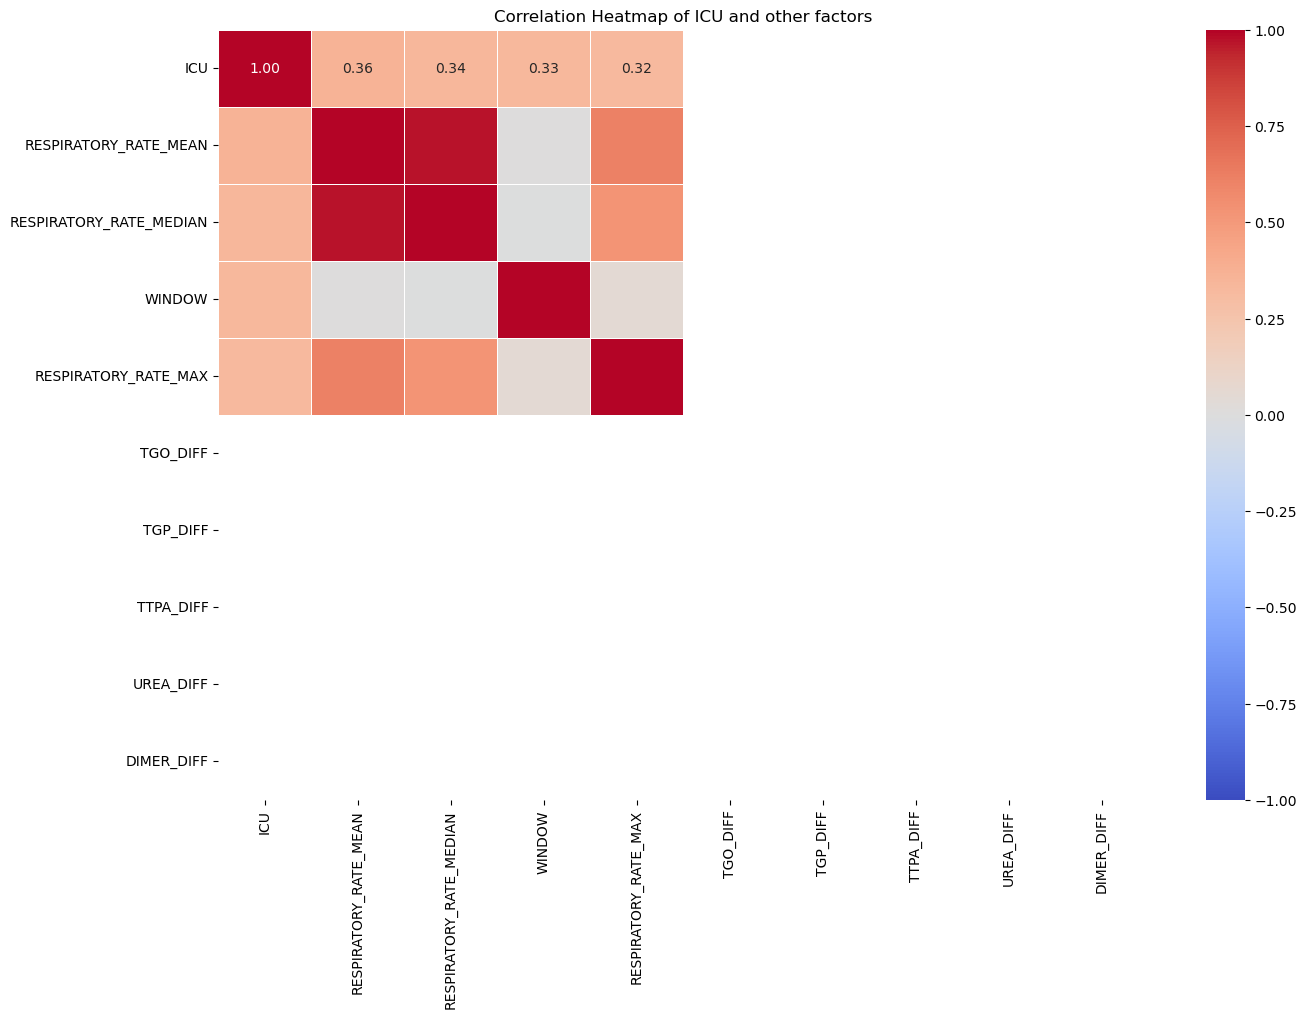

In [44]:
 top_features = corr_w_ICU.index[:5].tolist() + corr_w_ICU.index[-5:].tolist()
corr_matrix = df_filled[top_features].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of ICU and other factors')

In [21]:
X = df_filled.drop(['ICU'], axis=1)
y = df_filled['ICU']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LogisticRegression(max_iter=1000)
model

model.fit(X_train, y_train)

C:\Users\manao\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Logistic Regression Model Accuracy:  0.8467532467532467
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       278
           1       0.81      0.59      0.68       107

    accuracy                           0.85       385
   macro avg       0.83      0.77      0.79       385
weighted avg       0.84      0.85      0.84       385

[[263  15]
 [ 44  63]]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

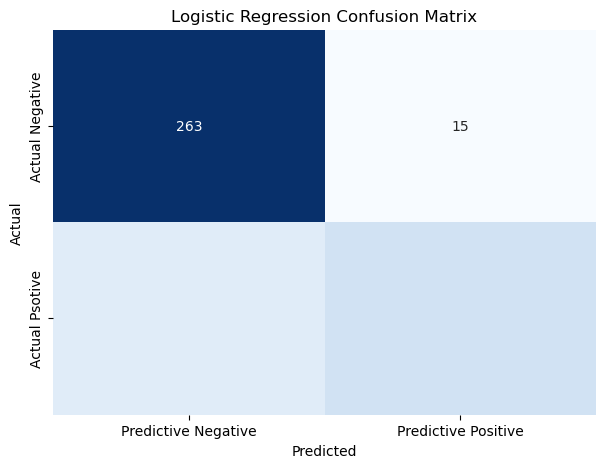

In [23]:
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels = ['Predictive Negative' , 'Predictive Positive'],
            yticklabels = ['Actual Negative', 'Actual Psotive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

In [24]:
random_forest_classifier = RandomForestClassifier(n_estimators=200, max_depth=3)
random_forest_classifier.fit(X_train, y_train)
random_forest_y_pred = random_forest_classifier.predict(X_test)

print("Random Forest Accuracy :", accuracy_score(y_test, random_forest_y_pred))
print(classification_report(y_test,random_forest_y_pred))

Random Forest Accuracy : 0.8025974025974026
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       278
           1       0.88      0.34      0.49       107

    accuracy                           0.80       385
   macro avg       0.84      0.66      0.68       385
weighted avg       0.82      0.80      0.77       385



In [25]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_classifier.predict(X_test)




print("Decision tree Accuracy :", accuracy_score(y_test, decision_tree_y_pred))
print(classification_report(y_test,decision_tree_y_pred))


Decision tree Accuracy : 0.8311688311688312
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       278
           1       0.69      0.71      0.70       107

    accuracy                           0.83       385
   macro avg       0.79      0.79      0.79       385
weighted avg       0.83      0.83      0.83       385



In [26]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20, 25],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Parameters Used:", grid_search.best_params_)


print("Optimized accuracy:", test_accuracy)

Parameters Used: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Optimized accuracy: 0.8467532467532467
